In [68]:
from pycqed.analysis.decoupling import decoupling_analysis as dec_a
import numpy as np
import matplotlib.pyplot as plt
from imp import reload

In [69]:
reload(dec_a)

<module 'pycqed.analysis.decoupling.decoupling_analysis' from 'd:\\repositories\\pycqed_py3\\pycqed\\analysis\\decoupling\\decoupling_analysis.py'>

We start by defining an analysis object

In [72]:
analysis_obj = dec_a.DecouplingAnalysis(N=2, 
                                        scan_start='20170227_154129',
                                        scan_stop='20170227_164338',
                                        qubit_scan_labels=['QL','QR'],
                                        dac_mapping=[2,1],
                                        num_points=8)

We call the data extraction (There is still no auto_run as we are still coding this module)

In [73]:
analysis_obj.extract_data()

We plot the raw data

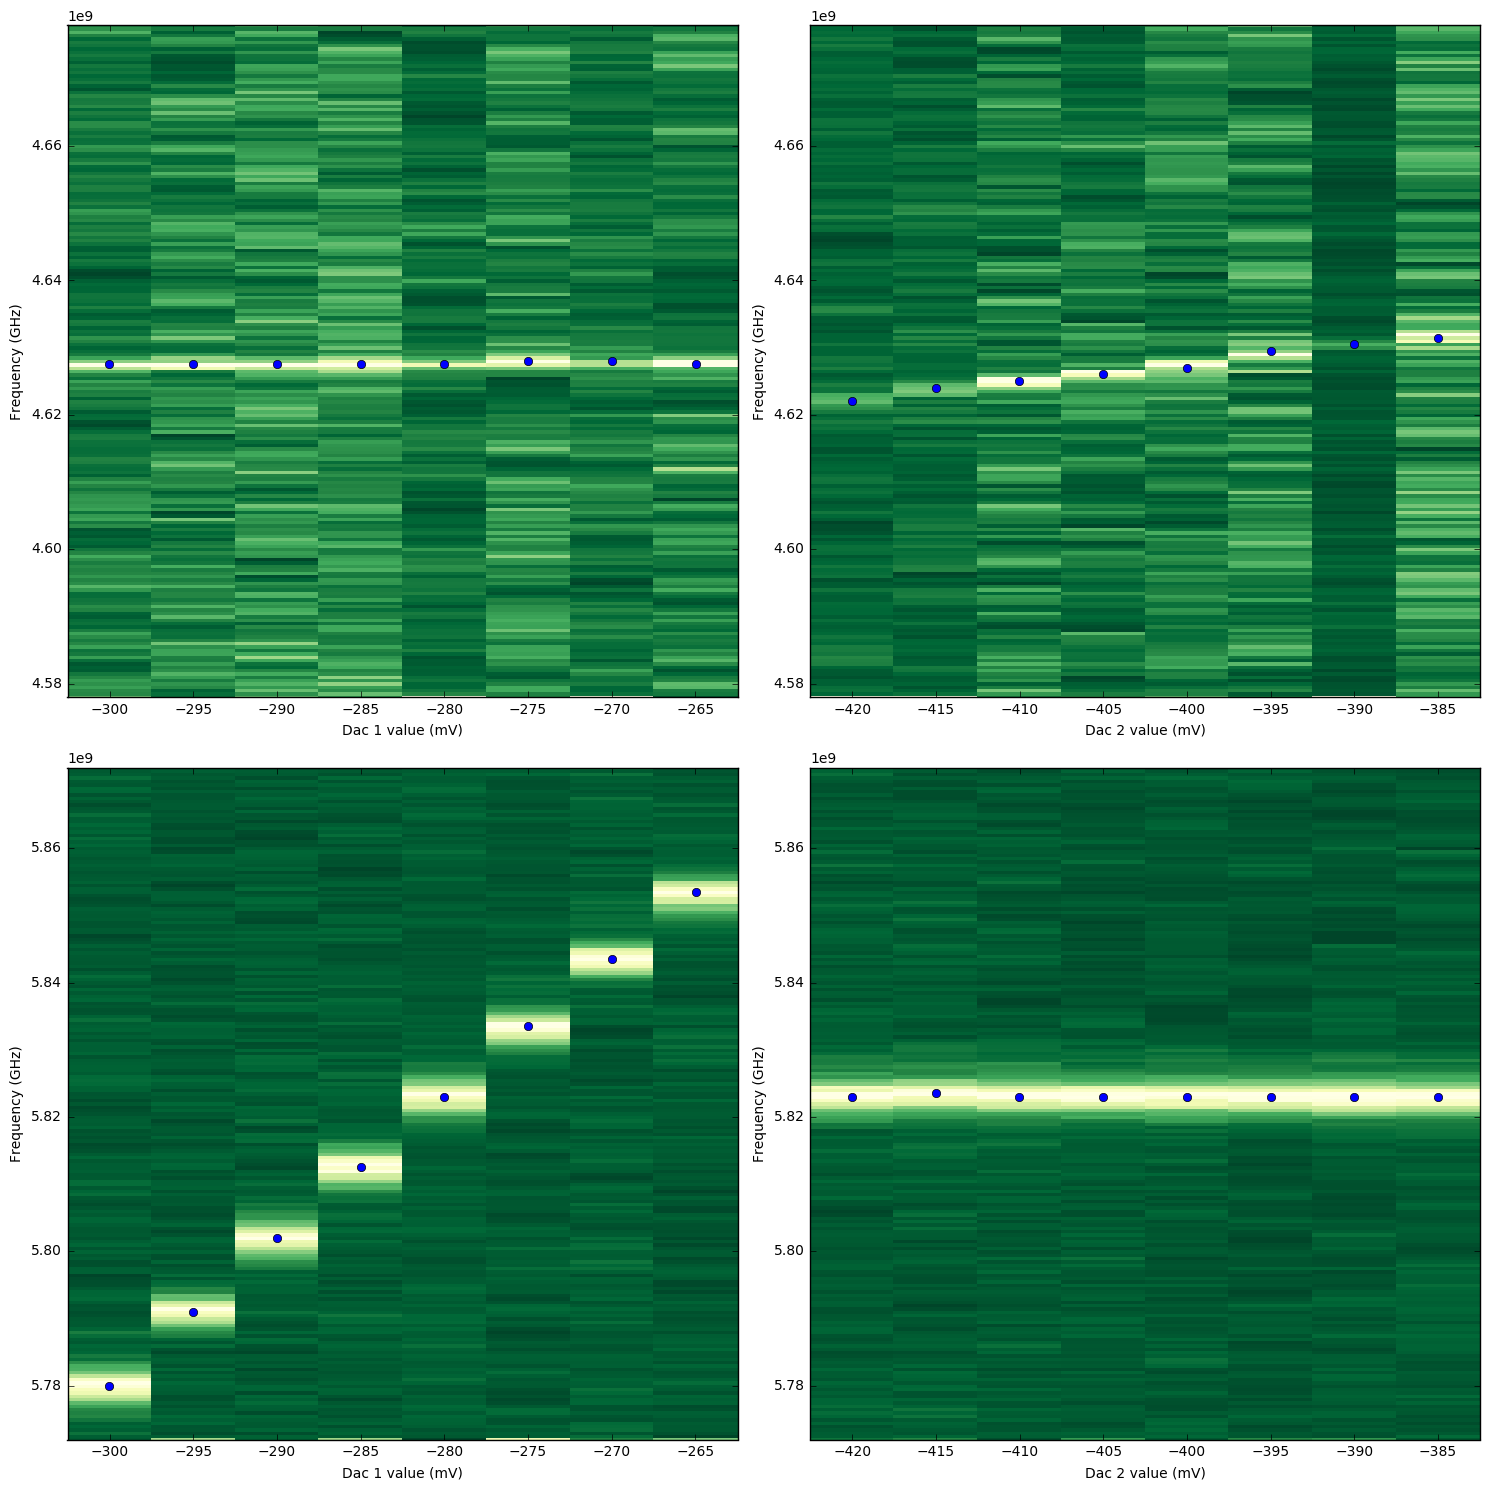

In [74]:
%matplotlib inline
analysis_obj.plot_freq_vs_dac_raw()

And then we plot the fits

array([[    9508.89254346,   269962.18453588],
       [ 2097923.77419034,    -5943.05783985]])

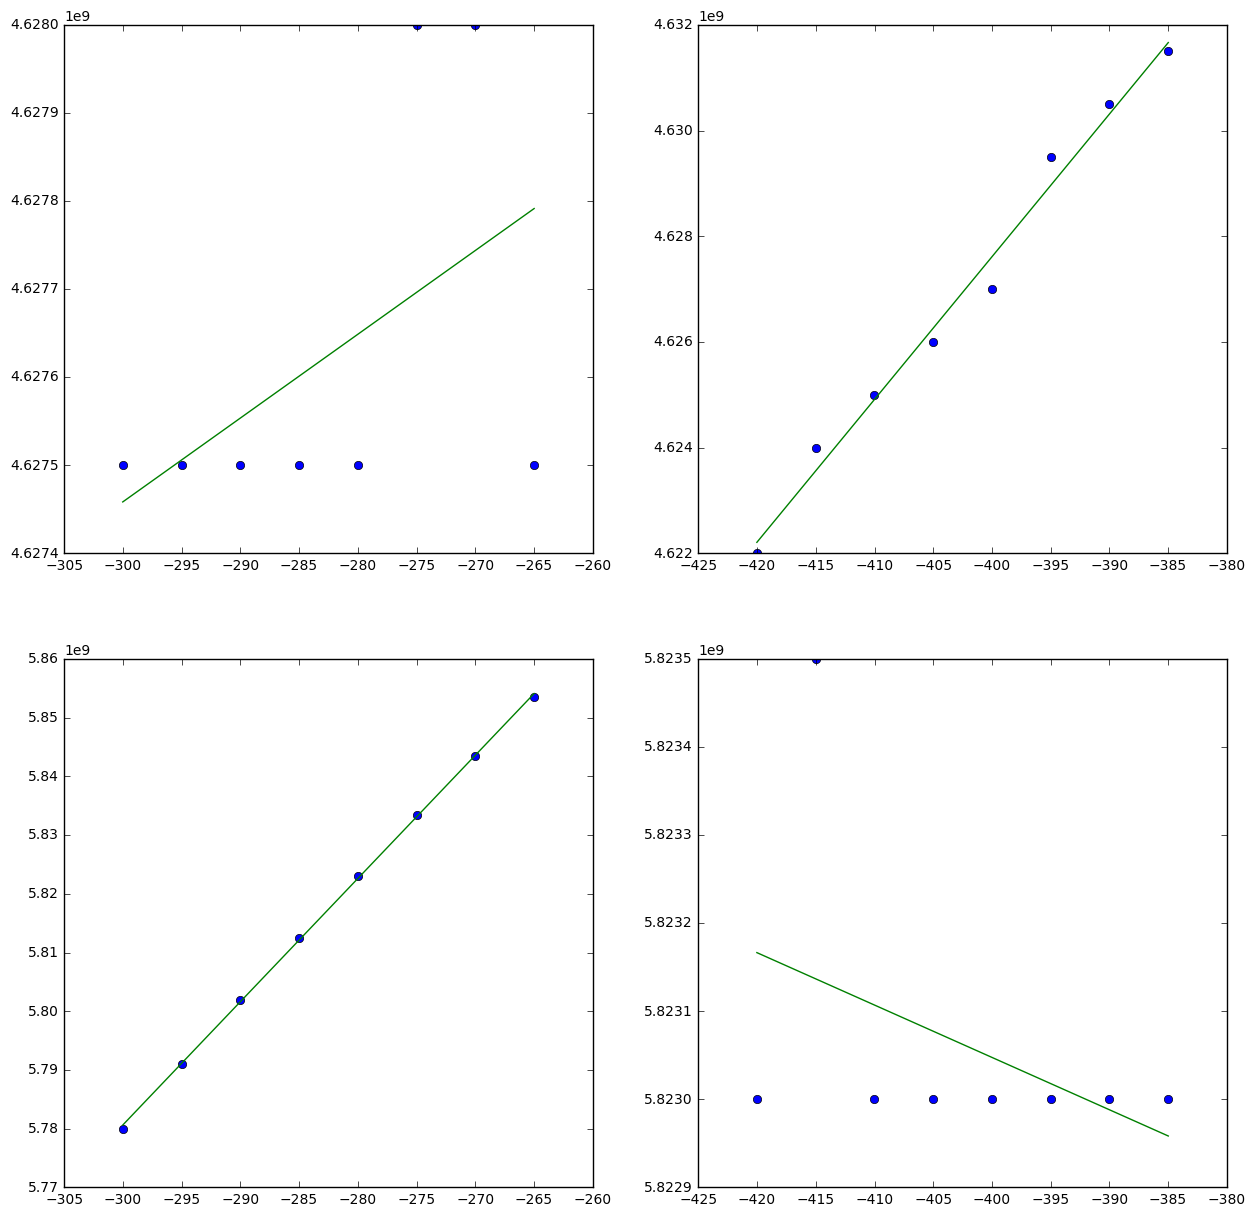

In [75]:
analysis_obj.plot_fit_freq_vs_dac()

The fits are non-sense, and that is because we have outliers. We can take them out by defining the proper filtering mask.

The filtering mask is an NxNxnum_points vector: 
   - Its first dimension corresponds to dac channel
   - Its second dimension to qubit
   - Its last to the points in the scan

For example, if we would like to take out point number 3, of qubit 1(rows) on dac 2 (columns) we would do:

    point_number = 2 # = 3 - 1 because python starts counting at 0
    qubit_number = 0 # = 1 - 1 because python starts counting at 0
    dac_number = 1 # 2 - 1 because python starts counting at 0
    analysis_obj.filter_mask_vector[dac_number,qubit_number,point_number] = True

In [76]:
filter_mask_vector = np.zeros((analysis_obj.N,analysis_obj.N,analysis_obj.num_points),dtype=np.bool)
filter_mask_vector[:,:,:] = False
# format is (dac_channel-1, qubit, point)
list_out = [[0,0,-2],[0,0,-3],[1,1,1]]
for el in list_out:
    filter_mask_vector[el[0],el[1],el[2]] = True
analysis_obj.filter_mask_vector = filter_mask_vector

array([[ -4.62738071e-08,   2.69962185e+05],
       [  2.09792377e+06,  -2.78745938e-08]])

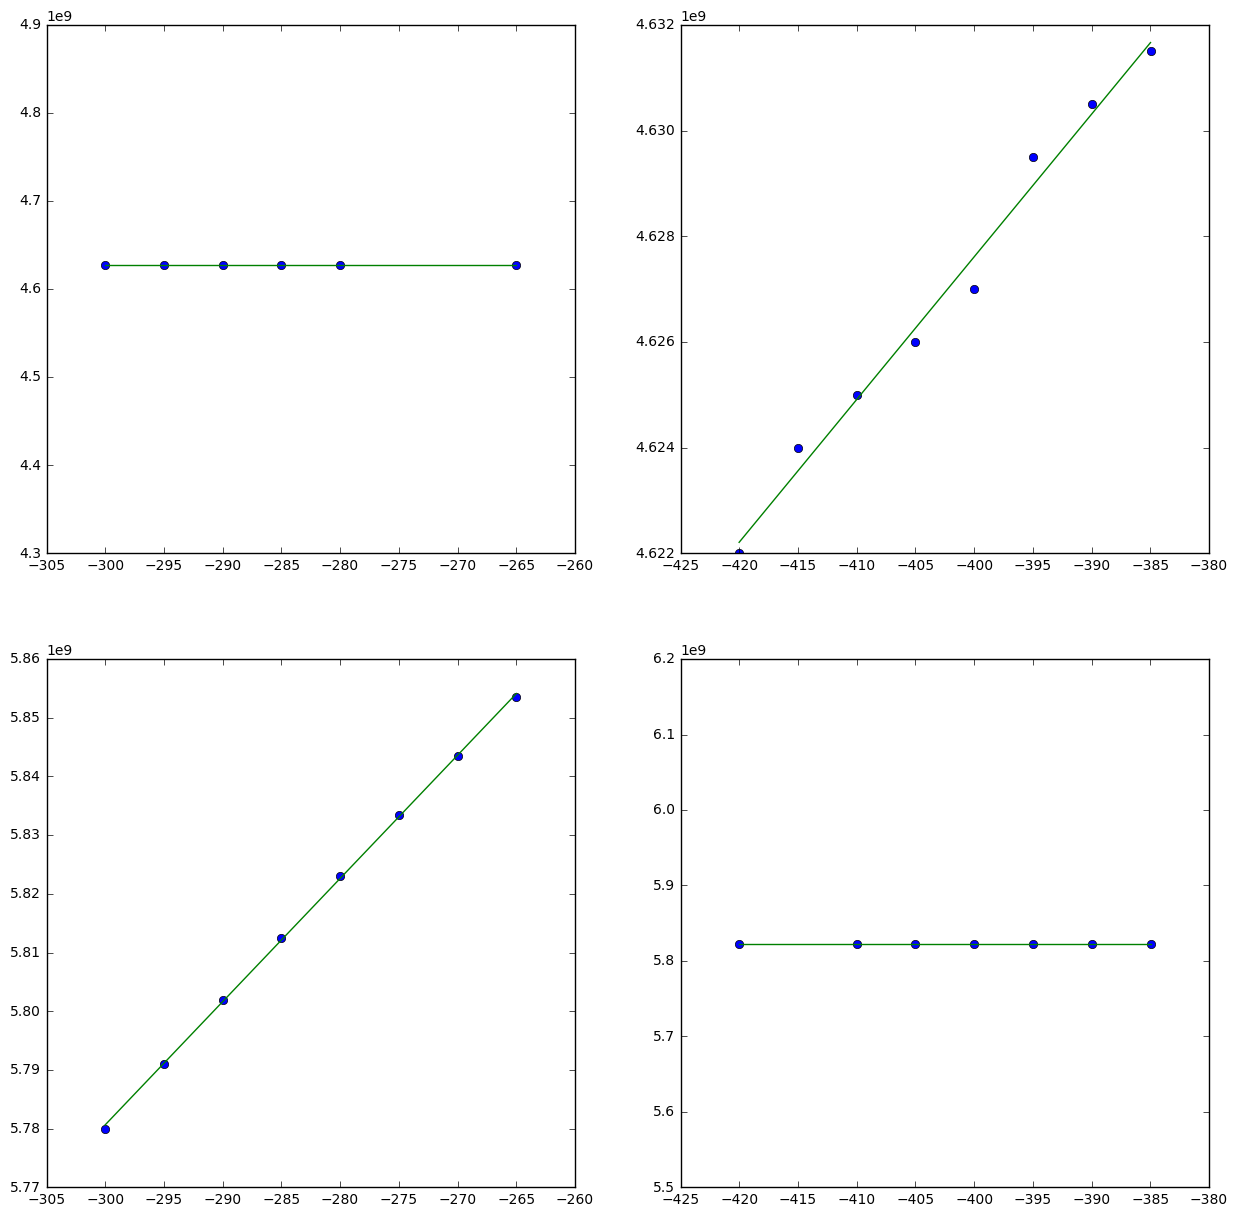

In [77]:
analysis_obj.plot_fit_freq_vs_dac()